## Q2

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
# from Utils import *
# from Templates import *
from torch.utils.data import Dataset, DataLoader

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import os
path = os.getcwd() + '/drive/MyDrive/ComputerVision/Assignment_3/'

!cp /content/drive/MyDrive/ComputerVision/Assignment_3/Templates.py .
!cp /content/drive/MyDrive/ComputerVision/Assignment_3/Utils.py .

from Utils import *
from Templates import *

In [4]:
trainset = DataAugment(path + 'dataset/',type = 1,train= True)
train_loader = DataLoader(trainset, batch_size = 100, shuffle = True,num_workers = 4)

testset = DataAugment(path + 'dataset/',type = 1,train= False)
test_loader = DataLoader(testset, batch_size = 10, shuffle = True,num_workers = 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [5]:
epochs = 2
lr = 1e-3
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
log_interval = 1
trained = True
# path = './Models/'
save = False

net = Model().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr) 

train_losses = []
train_loss = 0

if trained:
    d = torch.load(path+'/Models/q2.pth')
    train_losses = d['train_losses']
    net.load_state_dict(d['state_dict'])

In [ ]:
for e in range(epochs):
    net.train()
    for idx, data in enumerate(train_loader):
        inpt = data['x'].to(device)
        mask = data['y_mask'].to(device)
        
        optimizer.zero_grad()
        output = net(inpt)
        loss = criterion(output,mask)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if idx %log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, idx, len(train_loader),
                100. * idx*len(data) / len(train_loader.dataset), loss.item()))
            if save :
                d = {'state_dict':net.state_dict(), 'train_losses': train_losses}
                torch.save(d,path + '/Models/q2.pth')
                print("Model Saved Epoch: {},Idx:{}".format(e,idx))
    
    train_loss /= len(train_loader.dataset)
    train_loss.append(train_loss)

/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Train Epoch: 0 [0/600 (0%)]	Loss: 0.037833
Model Saved Epoch: 0,Idx:0
Train Epoch: 0 [1/600 (0%)]	Loss: 0.289944
Model Saved Epoch: 0,Idx:1
Train Epoch: 0 [2/600 (0%)]	Loss: 0.090883
Model Saved Epoch: 0,Idx:2
Train Epoch: 0 [3/600 (0%)]	Loss: 0.075104
Model Saved Epoch: 0,Idx:3
Train Epoch: 0 [4/600 (0%)]	Loss: 0.101826
Model Saved Epoch: 0,Idx:4
Train Epoch: 0 [5/600 (0%)]	Loss: 0.080951
Model Saved Epoch: 0,Idx:5
Train Epoch: 0 [6/600 (0%)]	Loss: 0.059114
Model Saved Epoch: 0,Idx:6
Train Epoch: 0 [7/600 (0%)]	Loss: 0.068771
Model Saved Epoch: 0,Idx:7
Train Epoch: 0 [8/600 (0%)]	Loss: 0.062350
Model Saved Epoch: 0,Idx:8
Train Epoch: 0 [9/600 (0%)]	Loss: 0.059973
Model Saved Epoch: 0,Idx:9
Train Epoch: 0 [10/600 (0%)]	Loss: 0.052463
Model Saved Epoch: 0,Idx:10
Train Epoch: 0 [11/600 (0%)]	Loss: 0.057974
Model Saved Epoch: 0,Idx:11
Train Epoch: 0 [12/600 (0%)]	Loss: 0.055670
Model Saved Epoch: 0,Idx:12
Train Epoch: 0 [13/600 (0%)]	Loss: 0.057327
Model Saved Epoch: 0,Idx:13
Train Epoch:

KeyboardInterrupt: ignored

In [ ]:
print(data['y_mask'].shape)
print(out.shape)
criterion(out,data['y_mask'])

/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


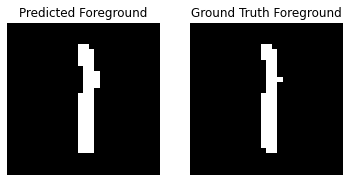

In [7]:
idx,data = next(enumerate(test_loader))
output = net(data['x'].to(device)).to('cpu')
plt.subplot(1,2,1)
plt.title("Predicted Foreground")
plt.imshow((output[0].detach() >0.5).numpy()[0],cmap = plt.cm.gray); plt.axis('off')
plt.subplot(1,2,2)
plt.title("Ground Truth Foreground")
plt.imshow(data['y_mask'][0].numpy()[0],cmap = plt.cm.gray); plt.axis('off')
a = data['y_mask'][0].numpy()[0]
b = (output[0].detach() >0.5 ).numpy()[0]

In [ ]:
print(np.logical_and(a == 1,b == 1).sum())
print(np.logical_or(a == 1,b == 1).sum())


def JSim1(model,test_loader,device):
    average_similarity = 0
    model.eval()
    with torch.no_grad():
        for idx,data in enumerate(test_loader):
            inpt = data['x'].to(device)
            mask = data['y_mask'].to(device)
            output = model(inpt).cpu()
            for i in range(len(data['x'])):
                a = data['y_mask'][i].numpy()
                b = (output[i].detach() >0.5).numpy()
                sim = np.logical_and(a == 1, b ==1 ).sum()/np.logical_or(a == 1, b ==1 ).sum()
                average_similarity += sim
        average_similarity /= len(test_loader.dataset)
    return average_similarity

88
99


In [ ]:
JSim1(net,test_loader,device)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()


0.9001051448579861